In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

air = pd.read_csv("Air2.csv")
air



,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
5,1.2,1197,38,4.7,750,89,1337,96,1393,949,11.2,59.2,0.7848
6,1.2,1185,31,3.6,690,62,1462,77,1333,733,11.3,56.8,0.7603
7,1.0,1136,31,3.3,672,62,1453,76,1333,730,10.7,60.0,0.7702
8,0.9,1094,24,2.3,609,45,1579,60,1276,620,10.7,59.7,0.7648
9,0.6,1010,19,1.7,561,-200,1705,-200,1235,501,10.3,60.2,0.7517


In [91]:
air_x = air.iloc[:, 0:13]
air_x.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [92]:
x_array = np.array(air_x)
print(x_array)

[[ 2.600e+00  1.360e+03  1.500e+02 ...  1.360e+01  4.890e+01  7.578e-01]
 [ 2.000e+00  1.292e+03  1.120e+02 ...  1.330e+01  4.770e+01  7.255e-01]
 [ 2.200e+00  1.402e+03  8.800e+01 ...  1.190e+01  5.400e+01  7.502e-01]
 ...
 [ 2.400e+00  1.142e+03 -2.000e+02 ...  2.690e+01  1.830e+01  6.406e-01]
 [ 2.100e+00  1.003e+03 -2.000e+02 ...  2.830e+01  1.350e+01  5.139e-01]
 [ 2.200e+00  1.071e+03 -2.000e+02 ...  2.850e+01  1.310e+01  5.028e-01]]


In [88]:
kmeans = KMeans(n_clusters = 10, random_state=123)
kmeans.fit(air)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [90]:
air["kluster"] = kmeans.labels_
air

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,kluster
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,8
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,8
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,8
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,8
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,8
5,1.2,1197,38,4.7,750,89,1337,96,1393,949,11.2,59.2,0.7848,5
6,1.2,1185,31,3.6,690,62,1462,77,1333,733,11.3,56.8,0.7603,5
7,1.0,1136,31,3.3,672,62,1453,76,1333,730,10.7,60.0,0.7702,5
8,0.9,1094,24,2.3,609,45,1579,60,1276,620,10.7,59.7,0.7648,4
9,0.6,1010,19,1.7,561,-200,1705,-200,1235,501,10.3,60.2,0.7517,4


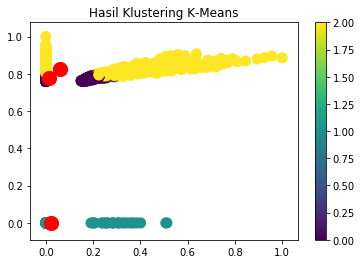

In [83]:
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = air.kluster, marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker="o");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()